In [1]:
using RegularizedSystems
using VSTom
using PyPlot

In [10]:
b = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557F00_fi_1_wght_2241ms.cdf")
a = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557F00_fi_2_wght_2271ms.cdf")
dw = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/Asger\ source\ code/31557_dW.nc")
spec = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557_measured_spectra.cdf")
true_dists = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/31557/31557_true_distributions.nc")

Dict{String,Any} with 12 entries:
  "True_before_coarse"     => [1.032929345536e12 9.24215934976e11 4.55640776704…
  "Maxwellian_after"       => [1.67653670912e12 1.612524552192e12 1.15601480089…
  "p_coarse"               => [-0.9599999785423279,-0.8589473366737366,-0.75789…
  "True_before_coarse_cut" => [0.0 0.0 0.0 1.97166792704e11 8.2034581504e10 3.2…
  "True_after_coarse"      => [1.676579438592e12 9.32470390784e11 2.86287200256…
  "TRANSP_before"          => [5.8270108e7 3.390611712e9 1.3274471424e10 1.6894…
  "E_coarse"               => [1.0,6.210526466369629,11.421052932739258,16.6315…
  "E"                      => [1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.…
  "True_after_coarse_cut"  => [0.0 0.0 0.0 8.1609637888e10 2.342208512e10 7.458…
  "TRANSP_after"           => [5.8001232e7 3.799691008e9 1.363231232e10 1.82397…
  "Maxwellian_before"      => [1.032883142656e12 1.19920656384e12 1.03776858931…
  "p"                      => [-0.9800000190734863,-0.9399999976158142,-0.8

In [17]:
energy = float64(b["energy"])
pitch = float64(b["pitch"])
wl = float64(b["central_wavel"])
wght_b = float64(b["weight"])
wght_a = float64(a["weight"]);

In [18]:
bb = read_ncdf("data/before_sawtooth_transfer_matrix.cdf")
ind1 = int(bb["spectrum_1_index"])
ind2 = int(bb["spectrum_2_index"])
ind3 = int(bb["spectrum_3_index"])
ind4 = int(bb["spectrum_4_index"])
ind5 = int(bb["spectrum_5_index"]);

In [19]:
spec1_b = float64(spec["intens"][1,ind1,1]')
spec1_a = float64(spec["intens"][1,ind1,2]')
err1_b  = float64(spec["error"][1,ind1,1]')
err1_a  = float64(spec["error"][1,ind1,2]')
wl1 = float64(spec["central_wavel"][1,ind1]')

spec2_b = float64(spec["intens"][2,ind2,1]')
spec2_a = float64(spec["intens"][2,ind2,2]')
err2_b  = float64(spec["error"][2,ind2,1]')
err2_a  = float64(spec["error"][2,ind2,2]')
wl2 = float64(spec["central_wavel"][2,ind2]')

spec3_b = float64(spec["intens"][3,ind3,1]')
spec3_a = float64(spec["intens"][3,ind3,2]')
err3_b  = float64(spec["error"][3,ind3,1]')
err3_a  = float64(spec["error"][3,ind3,2]')
wl3 = float64(spec["central_wavel"][3,ind3]')

spec4_b = float64(spec["intens"][4,ind4,1]')
spec4_a = float64(spec["intens"][4,ind4,2]')
err4_b  = float64(spec["error"][4,ind4,1]')
err4_a  = float64(spec["error"][4,ind4,2]')
wl4 = float64(spec["central_wavel"][4,ind4]')

spec5_b = float64(spec["intens"][5,ind5,1]')
spec5_a = float64(spec["intens"][5,ind5,2]')
err5_b  = float64(spec["error"][5,ind5,1]')
err5_a  = float64(spec["error"][5,ind5,2]')
wl5 = float64(spec["central_wavel"][5,ind5]');

In [20]:
E = energy .< 100
energy = energy[E]
nen =length(energy)

50

In [70]:
A1_b = zeros(length(wl1),nen*75)
A1_a = zeros(length(wl1),nen*75)
dwav = abs(wl1[2] - wl1[1])
for i=1:length(wl1)
    ind = indmin((wl .- wl1[i]).^2)
    A1_b[i,:] = reshape(reshape(wght_b[1,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A1_a[i,:] = reshape(reshape(wght_a[1,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [71]:
A2_b = zeros(length(wl2),nen*75)
A2_a = zeros(length(wl2),nen*75)
dwav = abs(wl2[2] - wl2[1])
for i=1:length(wl2)
    ind = indmin((wl .- wl2[i]).^2)
    A2_b[i,:] = reshape(reshape(wght_b[2,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A2_a[i,:] = reshape(reshape(wght_a[2,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [72]:
A3_b = zeros(length(wl3),nen*75)
A3_a = zeros(length(wl3),nen*75)
dwav = abs(wl3[2] - wl3[1])
for i=1:length(wl3)
    ind = indmin((wl .- wl3[i]).^2)
    A3_b[i,:] = reshape(reshape(wght_b[3,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A3_a[i,:] = reshape(reshape(wght_a[3,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [73]:
A4_b = zeros(length(wl4),nen*75)
A4_a = zeros(length(wl4),nen*75)
dwav = abs(wl4[2] - wl4[1])
for i=1:length(wl4)
    ind = indmin((wl .- wl4[i]).^2)
    A4_b[i,:] = reshape(reshape(wght_b[4,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
    A4_a[i,:] = reshape(reshape(wght_a[4,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi))
end

In [74]:
A5_b = zeros(length(wl5),nen*75)
A5_a = zeros(length(wl5),nen*75)
dwav = abs(wl5[2] - wl5[1])
for i=1:length(wl5)
    ind = indmin((wl .- wl5[i]).^2)
    A5_b[i,:] = reshape(reshape(wght_b[5,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi)) 
    A5_a[i,:] = reshape(reshape(wght_a[5,ind,E,:],nen,75)',nen*75)*(1e4 / (dwav*4*pi)) #(Ph*cm^3)/(m^2 *s*dE*dP*sr*nm)
end

In [98]:
dwav = wl
A_b = vcat(A1_b,A2_b,A3_b,A4_b,A5_b)
A_a = vcat(A1_a,A2_a,A3_a,A4_a,A5_a)
spec_b = reshape(vcat(spec1_b,spec2_b,spec3_b,spec4_b,spec5_b),1116)
err_b = reshape(vcat(err1_b,err2_b,err3_b,err4_b,err5_b),1116)
#err_b = spec_err["noise_before"]
spec_a = reshape(vcat(spec1_a,spec2_a,spec3_a,spec4_a,spec5_a),1116)
err_a = reshape(vcat(err1_a,err2_a,err3_a,err4_a,err5_a),1116);
#err_a = spec_err["noise_after"];

In [99]:
energy_50 = dw["E"]
pitch_50 = dw["p"]
A_b = resize_transfer_matrix(A_b,energy,pitch,energy_50,pitch_50);
A_a = resize_transfer_matrix(A_a,energy,pitch,energy_50,pitch_50);

In [93]:
bb = read_ncdf("data/31557_after_sawtooth_data.nc")

Dict{String,Any} with 6 entries:
  "transfer_matrix" => [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0…
  "data_hat"        => [0.556885302066803,0.9980168342590332,-0.423922121524810…
  "data"            => [5.97170105352192e14,1.068641550336e15,-4.43398464995328…
  "E"               => [1.0,6.210526466369629,11.421052932739258,16.63158035278…
  "noise"           => [1.072339450068992e15,1.070765076119552e15,1.04594318504…
  "p"               => [-0.9599999785423279,-0.8589473366737366,-0.757894694805…

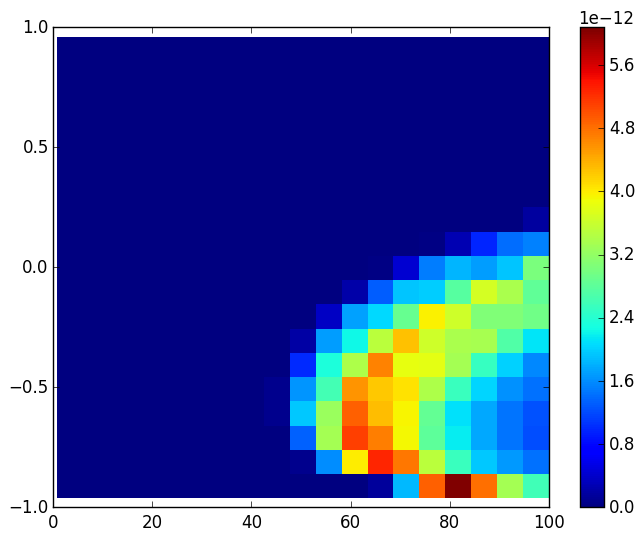

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd37fb1a6d8>

In [108]:
pcolor(bb["E"],bb["p"],reshape(bb["transfer_matrix"][144,:],20,20))
colorbar()

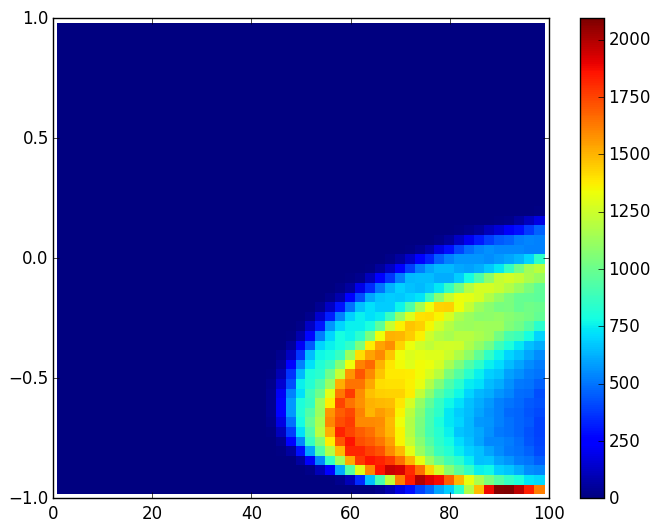

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd37f9f9c50>

In [109]:
pcolor(energy_50,pitch_50,reshape(A_a[144,:],50,50))
colorbar()

In [49]:
dw_dE = abs(energy_50[2]-energy_50[1])
dw_dP = abs(pitch_50[2]-pitch_50[1])
dtransfer = dw["dW"]/(dw_dE*dw_dP)/(4*pi);

In [52]:
using NetCDF

nrows, ncols = size(A_a)
nen = length(energy_50)
np = length(pitch_50)
# Write transfer matrix to file
fname = "data/after_sawtooth_data.cdf"

isfile(fname) && rm(fname)

nrows_id = NcDim("nrows",nrows)
ncols_id = NcDim("ncols",ncols)
nen_id = NcDim("energy",nen)
np_id = NcDim("pitch",np)

t_varid = NcVar("transfer_matrix",[nrows_id,ncols_id])
dw_varid = NcVar("dw",[nrows_id,ncols_id])
e_varid = NcVar("energy",nen_id)
p_varid = NcVar("pitch",np_id)
s_varid = NcVar("spectra",nrows_id)
err_varid = NcVar("error",nrows_id)
ncid = NetCDF.create(fname,[t_varid,dw_varid,e_varid,p_varid,s_varid,err_varid],mode=NC_CLASSIC_MODEL)

NetCDF.putvar(ncid,"transfer_matrix",A_a)
NetCDF.putvar(ncid,"dw",dtransfer)
NetCDF.putvar(ncid,"energy",energy_50)
NetCDF.putvar(ncid,"pitch",pitch_50)
NetCDF.putvar(ncid,"spectra",spec_a)
NetCDF.putvar(ncid,"error",err_a)
NetCDF.close(ncid);

In [53]:
nrows, ncols = size(A_b)
nen = length(energy_50)
np = length(pitch_50)
# Write transfer matrix to file
fname = "data/before_sawtooth_data.cdf"

isfile(fname) && rm(fname)

nrows_id = NcDim("nrows",nrows)
ncols_id = NcDim("ncols",ncols)
nen_id = NcDim("energy",nen)
np_id = NcDim("pitch",np)

t_varid = NcVar("transfer_matrix",[nrows_id,ncols_id])
dw_varid = NcVar("dw",[nrows_id,ncols_id])
e_varid = NcVar("energy",nen_id)
p_varid = NcVar("pitch",np_id)
s_varid = NcVar("spectra",nrows_id)
err_varid = NcVar("error",nrows_id)
ncid = NetCDF.create(fname,[t_varid,dw_varid,e_varid,p_varid,s_varid,err_varid],mode=NC_CLASSIC_MODEL)

NetCDF.putvar(ncid,"transfer_matrix",A_b)
NetCDF.putvar(ncid,"dw",dtransfer)
NetCDF.putvar(ncid,"energy",energy_50)
NetCDF.putvar(ncid,"pitch",pitch_50)
NetCDF.putvar(ncid,"spectra",spec_b)
NetCDF.putvar(ncid,"error",err_b)
NetCDF.close(ncid);

In [51]:
A_b

1116x2500 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.00071815  0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.00071815  0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.00755494  0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.00755494  0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0311427   0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0311427   0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.250271    0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.250271    0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.84887     0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.84887     0.0         0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  15.3644      0.00250847  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     15.3644      0.00250847  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  